In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import scienceplots  
plt.style.use(['science','notebook', 'grid'])
# plt.style.use('seaborn')

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

In [30]:
# velocity of string 1
v1 = np.array([53.208,76.344,90.720,108.000,122.160])
v3 = np.array([50.02,73.70,89.28,105.60,120.72])
v2 = np.array([58.56,84.00,105.65,118.80,135.36])
# Tension of string 1
T = np.array([5.1269,10.2538,15.3807,20.5076,25.6345])
sqrt_T = np.array([2.26427,3.20216,3.92182,4.52853,5.06305])

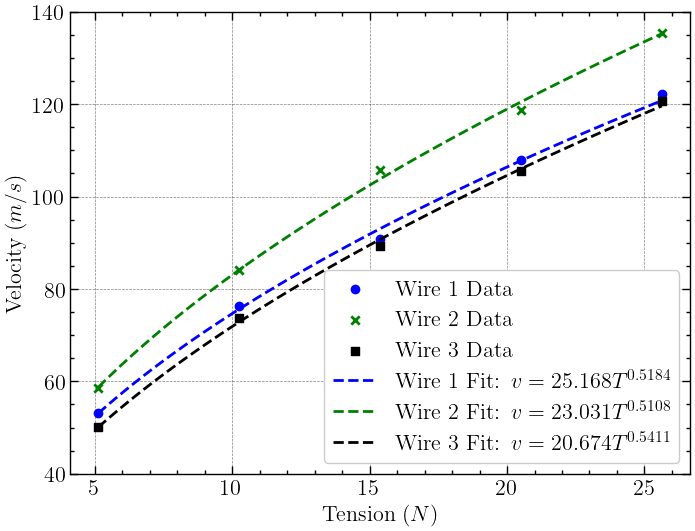

Wire 1: v = 23.0313 * T^0.5108
Wire 2: v = 25.1680 * T^0.5184
Wire 3: v = 20.6765 * T^0.5411


In [44]:
def power_law_fit(T, v):
    log_T = np.log(T)
    log_v = np.log(v)
    coef = np.polyfit(log_T, log_v, 1)  # Linear fit in log-log space
    b = coef[0]  # Power exponent
    a = np.exp(coef[1])  # Convert ln(a) back to a
    return a, b

# Fit power-law models
a1, b1 = power_law_fit(T, v1)
a2, b2 = power_law_fit(T, v2)
a3, b3 = power_law_fit(T, v3)
 
# Generate smooth fitted curves
T_fit = np.linspace(min(T), max(T), 100)
v1_fit = a1 * T_fit**b1
v2_fit = a2 * T_fit**b2
v3_fit = a3 * T_fit**b3

# Plot data and fits
plt.figure(figsize=(8,6))
plt.scatter(T, v1, label="Wire 1 Data", color="b", marker='o')
plt.scatter(T, v2, label="Wire 2 Data", color="g", marker='x')
plt.scatter(T, v3, label="Wire 3 Data", color="k", marker='s')

plt.plot(T_fit, v1_fit, 'b--', label="Wire 1 Fit: $v = 25.168 T^{0.5184}$")
plt.plot(T_fit, v2_fit, 'g--', label="Wire 2 Fit: $v = 23.031T^{0.5108}$")
plt.plot(T_fit, v3_fit, 'k--', label="Wire 3 Fit: $v = 20.674T^{0.5411}$")

# Labels and legend
plt.xlabel("Tension ($N$)")
plt.ylabel("Velocity ($m/s$)")
# plt.title("Velocity vs. Tension for Three Wires")
plt.legend()
plt.ylim(40, 140)
# plt.savefig('main.png')
plt.show()

# Print results
print(f"Wire 1: v = {a1:.4f} * T^{b1:.4f}")
print(f"Wire 2: v = {a2:.4f} * T^{b2:.4f}")
print(f"Wire 3: v = {a3:.4f} * T^{b3:.4f}")

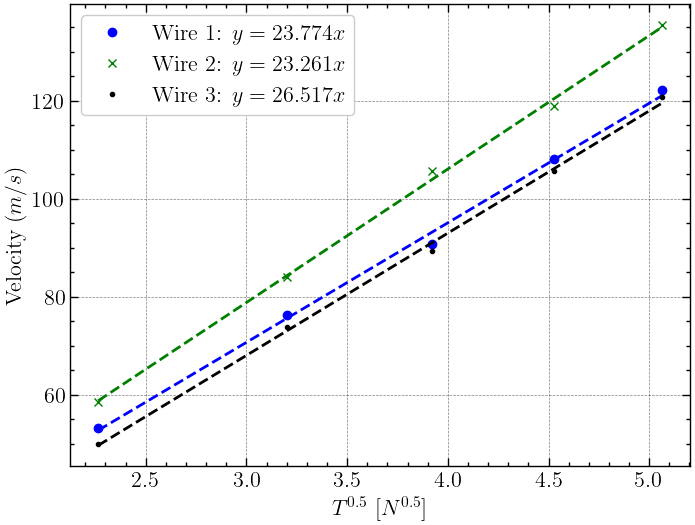

In [32]:
fig, ax = plt.subplots()

# Plot markers and store handles
marker1, = ax.plot(sqrt_T, v1, 'bo', label='Wire 1: $y=23.774x$')
line1, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v1, 1))(sqrt_T), '--b')

marker2, = ax.plot(sqrt_T, v2, 'gx', label='Wire 2: $y = 23.261x$')
line2, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v2, 1))(sqrt_T), '--g')

marker3, = ax.plot(sqrt_T, v3, 'k.', label='Wire 3: $y = 26.517x$')
line3, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v3, 1))(sqrt_T), '--k')

# Only add the markers to the legend
plt.legend(handles=[marker1, marker2, marker3], loc='best')
ax.set_xlabel('$T^{0.5}$ [$N^{0.5}$]')
ax.set_ylabel('Velocity ($m/s$)')
# plt.savefig('sqrt.png')
plt.show()


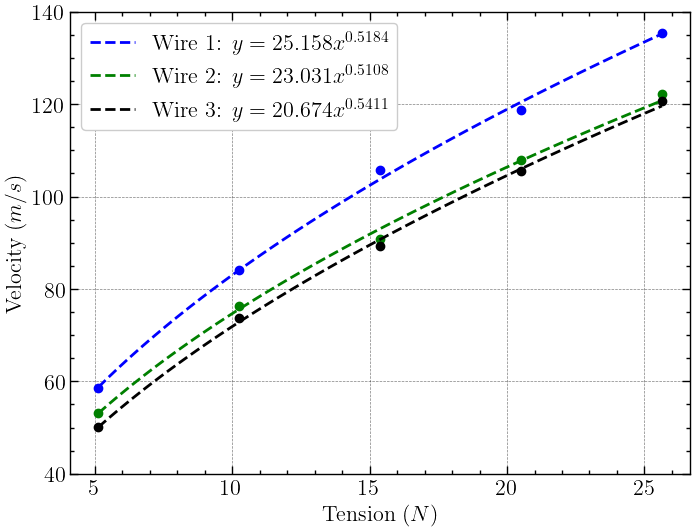

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(T, v1, color='g')
plt.plot(T1, y1, 'b--', label='Wire 1:  $y = 25.158x^{0.5184}$')
# plt.plot(T1, y1, 'b--', label='Wire 2:  $y = 23.031x^{0.5108}$')
ax.scatter(T, v2, color='b')
plt.plot(T1, y2, 'g--', label='Wire 2:  $y = 23.031x^{0.5108}$')
ax.scatter(T, v3, color='k')
plt.plot(T1, y3, 'k--', label='Wire 3: $y = 20.674x^{0.5411}$')
plt.ylim(40, 140)

ax.set_xlabel('Tension ($N$)')
ax.set_ylabel('Velocity ($m/s$)')

ax.legend()

In [167]:
v_1 = np.linspace(53.208, 122.160, 100)

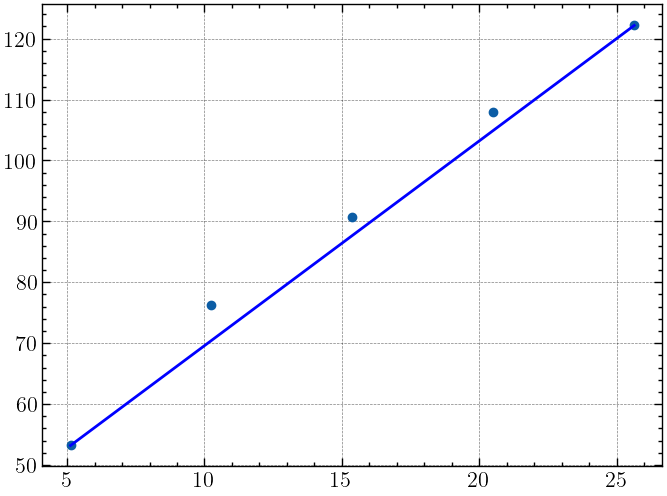

In [185]:
sqrt_T = np.array([2.26427,3.20216,3.92182,4.52853,5.06305])

fig, ax = plt.subplots(nrows=1, ncols=1)
# ax.plot(sqrt_T, v1, 'b--')
ax.plot(T1, v_1, color='b',)
ax.scatter(T, v1)
# ax.plot(sqrt_T, v2, 'x')
# ax.plot(sqrt_T, v3, '.')


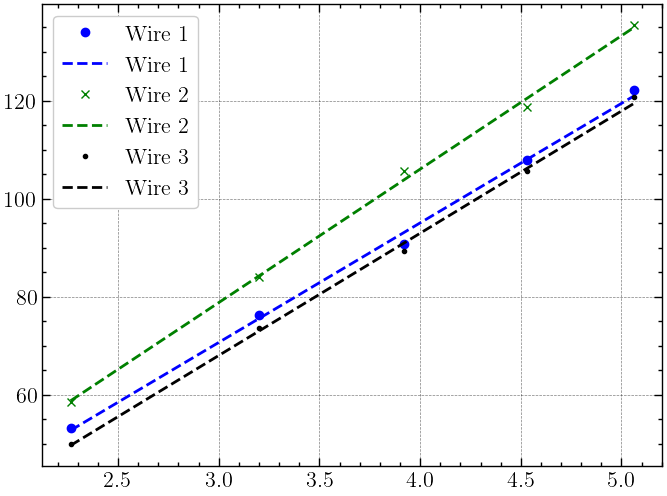

In [230]:
fig, ax = plt.subplots(nrows=1, ncols=1)

coef = np.polyfit(sqrt_T, v1,1)
poly1d_fn = np.poly1d(coef) 
ax.plot(sqrt_T, v1, 'bo', sqrt_T, poly1d_fn(sqrt_T), '--b', label='Wire 1') #'--k'=black dashed line, 'yo' = yellow circle marker

coef1 = np.polyfit(sqrt_T, v2,1)
poly1d_fn1 = np.poly1d(coef1) 
ax.plot(sqrt_T, v2, 'gx', sqrt_T, poly1d_fn1(sqrt_T), '--g', label='Wire 2') #'--k'=black dashed line, 'yo' = yellow circle marker

coef2 = np.polyfit(sqrt_T, v3,1)
poly1d_fn2 = np.poly1d(coef2) 
ax.plot(sqrt_T, v3, 'k.', sqrt_T, poly1d_fn2(sqrt_T), '--k', label='Wire 3') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.legend()
plt.show()

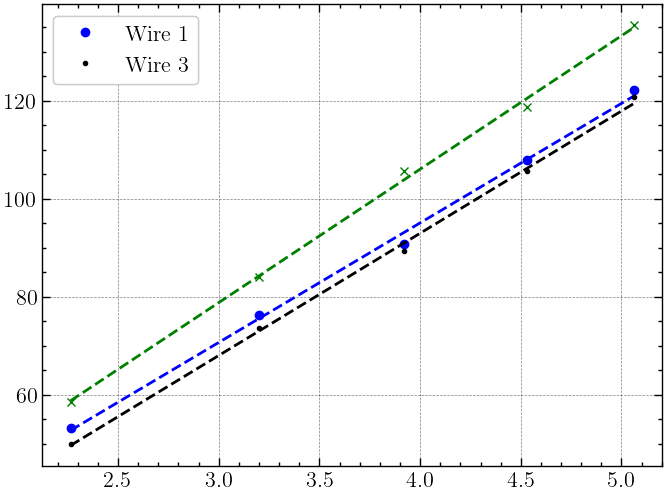

In [232]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sqrt_T, v1, v2, v3 are defined

fig, ax = plt.subplots()

# Plot data points and fit lines separately for each wire
coef = np.polyfit(sqrt_T, v1, 1)
poly1d_fn = np.poly1d(coef)
ax.plot(sqrt_T, v1, 'bo', label='Wire 1')
ax.plot(sqrt_T, poly1d_fn(sqrt_T), '--b')

coef1 = np.polyfit(sqrt_T, v2, 1)
poly1d_fn1 = np.poly1d(coef1)
ax.plot(sqrt_T, v2, 'gx', label='Wire 2')
ax.plot(sqrt_T, poly1d_fn1(sqrt_T), '--g')

coef2 = np.polyfit(sqrt_T, v3, 1)
poly1d_fn2 = np.poly1d(coef2)
ax.plot(sqrt_T, v3, 'k.', label='Wire 3')
ax.plot(sqrt_T, poly1d_fn2(sqrt_T), '--k')

# Create legend only for markers
handles, labels = ax.get_legend_handles_labels()
marker_legend = plt.legend(handles[::2], labels[::2], loc='best')  # Select every second item starting from 0 (markers)
ax.add_artist(marker_legend)  # Add marker legend back to the plot

plt.show()


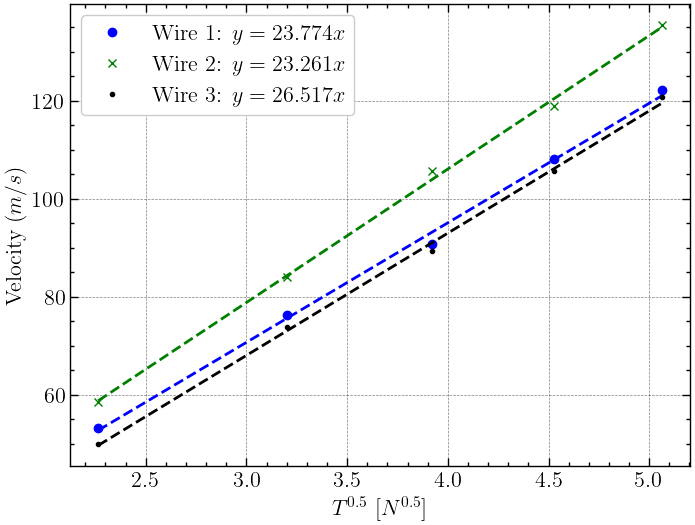

In [244]:
fig, ax = plt.subplots()

# Plot markers and store handles
marker1, = ax.plot(sqrt_T, v1, 'bo', label='Wire 1: $y=23.774x$')
line1, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v1, 1))(sqrt_T), '--b')

marker2, = ax.plot(sqrt_T, v2, 'gx', label='Wire 2: $y = 23.261x$')
line2, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v2, 1))(sqrt_T), '--g')

marker3, = ax.plot(sqrt_T, v3, 'k.', label='Wire 3: $y = 26.517x$')
line3, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v3, 1))(sqrt_T), '--k')

# Only add the markers to the legend
plt.legend(handles=[marker1, marker2, marker3], loc='best')
ax.set_xlabel('$T^{0.5}$ [$N^{0.5}$]')
ax.set_ylabel('Velocity ($m/s$)')
plt.savefig('sqrt.png')
plt.show()


In [ ]:
# velocity of string 1
v1 = np.array([53.208,76.344,90.720,108.000,122.160])
v3 = np.array([50.02,73.70,89.28,105.60,120.72])
v2 = np.array([58.56,84.00,105.65,118.80,135.36])
# Tension of string 1
T = np.array([5.1269,10.2538,15.3807,20.5076,25.6345])

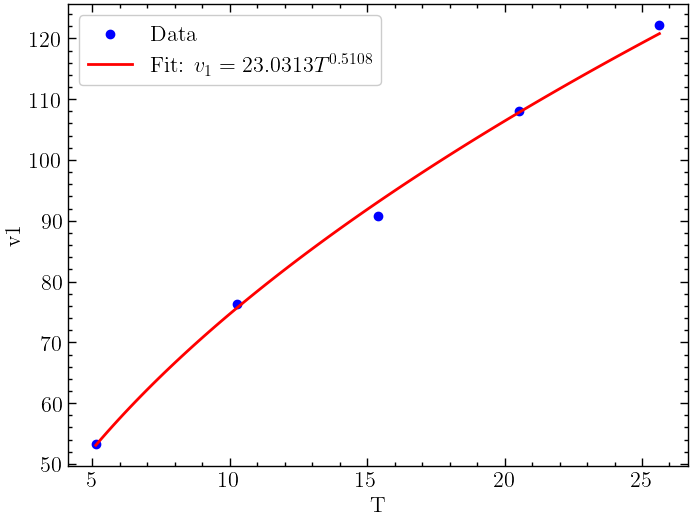

Fitted equation: v1 = 23.0313 * T^0.5108


In [253]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
T = np.array([5.1269, 10.2538, 15.3807, 20.5076, 25.6345])
v1 = np.array([53.208, 76.344, 90.720, 108.000, 122.160])

# Apply logarithm transformation
log_T = np.log(T)
log_v1 = np.log(v1)

# Perform linear regression on the transformed data
coef = np.polyfit(log_T, log_v1, 1)  # Fit y = mx + c
b = coef[0]  # Power exponent
a = np.exp(coef[1])  # Convert intercept back to a

# Generate fitted values
T_fit = np.linspace(min(T), max(T), 100)  # Smooth range for curve
v1_fit = a * T_fit**b  # Power function

# Plot data and fit
plt.scatter(T, v1, label="Data", color="b")
plt.plot(T_fit, v1_fit, label=f"Fit: $v_1 = {a:.4f}T^{{{b:.4f}}}$", color="r")
plt.xlabel("T")
plt.ylabel("v1")
plt.legend()
plt.grid()
plt.show()

# Print results
print(f"Fitted equation: v1 = {a:.4f} * T^{b:.4f}")


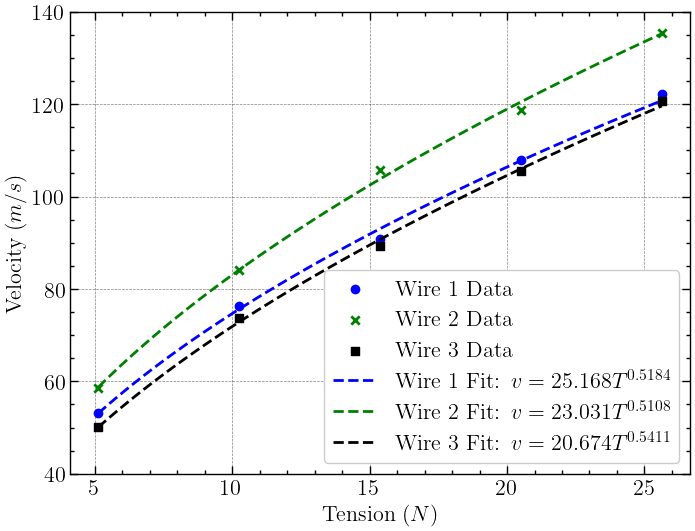

Wire 1: v = 23.0313 * T^0.5108
Wire 2: v = 25.1680 * T^0.5184
Wire 3: v = 20.6765 * T^0.5411


In [287]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
T = np.array([5.1269,10.2538,15.3807,20.5076,25.6345])
v1 = np.array([53.208,76.344,90.720,108.000,122.160])
v2 = np.array([58.56,84.00,105.65,118.80,135.36])
v3 = np.array([50.02,73.70,89.28,105.60,120.72])

# Function for power-law fitting
def power_law_fit(T, v):
    log_T = np.log(T)
    log_v = np.log(v)
    coef = np.polyfit(log_T, log_v, 1)  # Linear fit in log-log space
    b = coef[0]  # Power exponent
    a = np.exp(coef[1])  # Convert ln(a) back to a
    return a, b

# Fit power-law models
a1, b1 = power_law_fit(T, v1)
a2, b2 = power_law_fit(T, v2)
a3, b3 = power_law_fit(T, v3)
 
# Generate smooth fitted curves
T_fit = np.linspace(min(T), max(T), 100)
v1_fit = a1 * T_fit**b1
v2_fit = a2 * T_fit**b2
v3_fit = a3 * T_fit**b3

# Plot data and fits
plt.figure(figsize=(8,6))
plt.scatter(T, v1, label="Wire 1 Data", color="b", marker='o')
plt.scatter(T, v2, label="Wire 2 Data", color="g", marker='x')
plt.scatter(T, v3, label="Wire 3 Data", color="k", marker='s')

plt.plot(T_fit, v1_fit, 'b--', label="Wire 1 Fit: $v = 25.168 T^{0.5184}$")
plt.plot(T_fit, v2_fit, 'g--', label="Wire 2 Fit: $v = 23.031T^{0.5108}$")
plt.plot(T_fit, v3_fit, 'k--', label="Wire 3 Fit: $v = 20.674T^{0.5411}$")

# Labels and legend
plt.xlabel("Tension ($N$)")
plt.ylabel("Velocity ($m/s$)")
# plt.title("Velocity vs. Tension for Three Wires")
plt.legend()
plt.ylim(40, 140)
plt.savefig('main.png')
plt.show()

# Print results
print(f"Wire 1: v = {a1:.4f} * T^{b1:.4f}")
print(f"Wire 2: v = {a2:.4f} * T^{b2:.4f}")
print(f"Wire 3: v = {a3:.4f} * T^{b3:.4f}")


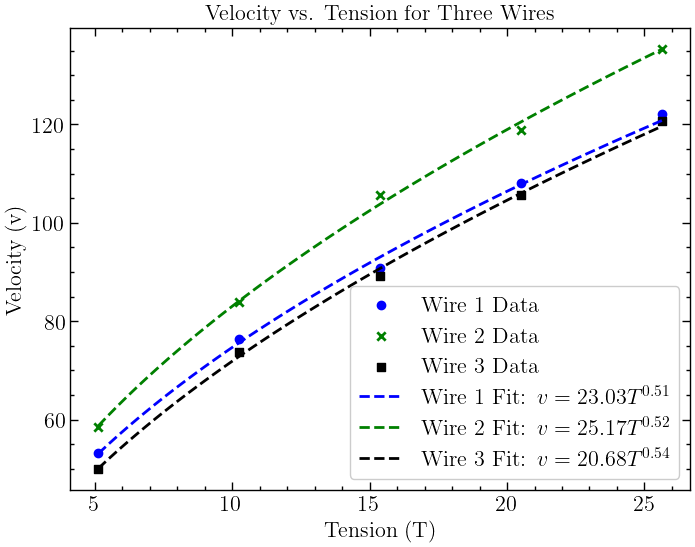

Wire 1: v = 23.0313 * T^0.5108
Wire 2: v = 25.1680 * T^0.5184
Wire 3: v = 20.6765 * T^0.5411


In [289]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
T = np.array([5.1269,10.2538,15.3807,20.5076,25.6345])
v1 = np.array([53.208,76.344,90.720,108.000,122.160])
v2 = np.array([58.56,84.00,105.65,118.80,135.36])
v3 = np.array([50.02,73.70,89.28,105.60,120.72])

# Function for power-law fitting
def power_law_fit(T, v):
    log_T = np.log(T)
    log_v = np.log(v)
    coef = np.polyfit(log_T, log_v, 1)  # Linear fit in log-log space
    b = coef[0]  # Power exponent
    a = np.exp(coef[1])  # Convert ln(a) back to a
    return a, b

# Fit power-law models
a1, b1 = power_law_fit(T, v1)
a2, b2 = power_law_fit(T, v2)
a3, b3 = power_law_fit(T, v3)

# Generate smooth fitted curves
T_fit = np.linspace(min(T), max(T), 100)
v1_fit = a1 * T_fit**b1
v2_fit = a2 * T_fit**b2
v3_fit = a3 * T_fit**b3

# Plot data and fits
plt.figure(figsize=(8,6))
plt.scatter(T, v1, label="Wire 1 Data", color="b", marker='o')
plt.scatter(T, v2, label="Wire 2 Data", color="g", marker='x')
plt.scatter(T, v3, label="Wire 3 Data", color="k", marker='s')

plt.plot(T_fit, v1_fit, 'b--', label=f"Wire 1 Fit: $v = {a1:.2f}T^{{{b1:.2f}}}$")
plt.plot(T_fit, v2_fit, 'g--', label=f"Wire 2 Fit: $v = {a2:.2f}T^{{{b2:.2f}}}$")
plt.plot(T_fit, v3_fit, 'k--', label=f"Wire 3 Fit: $v = {a3:.2f}T^{{{b3:.2f}}}$")

# Labels and legend
plt.xlabel("Tension (T)")
plt.ylabel("Velocity (v)")
plt.title("Velocity vs. Tension for Three Wires")
plt.legend()
plt.grid()
plt.show()

# Print results
print(f"Wire 1: v = {a1:.4f} * T^{b1:.4f}")
print(f"Wire 2: v = {a2:.4f} * T^{b2:.4f}")
print(f"Wire 3: v = {a3:.4f} * T^{b3:.4f}")
